[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sentiment Analysis for Smartphone X:
Competitor A: 0.40 (Sentiment Score)
Competitor B: 0.36 (Sentiment Score)


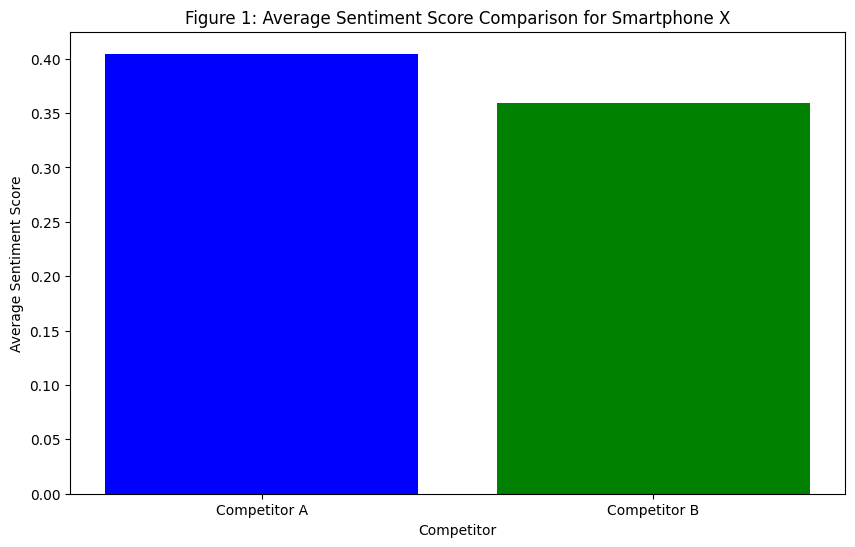

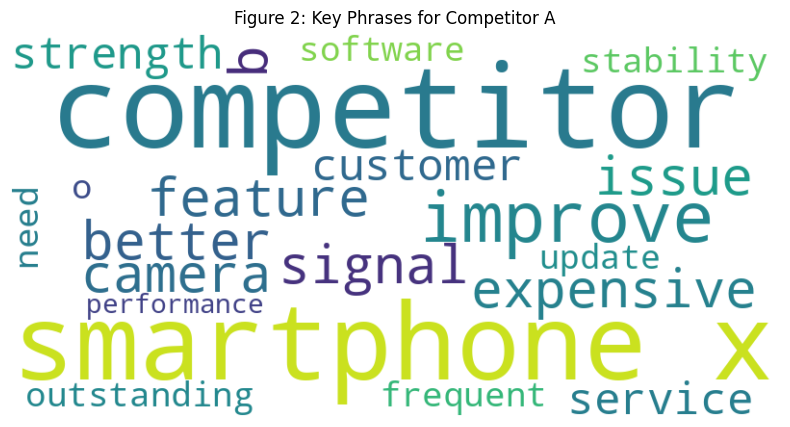

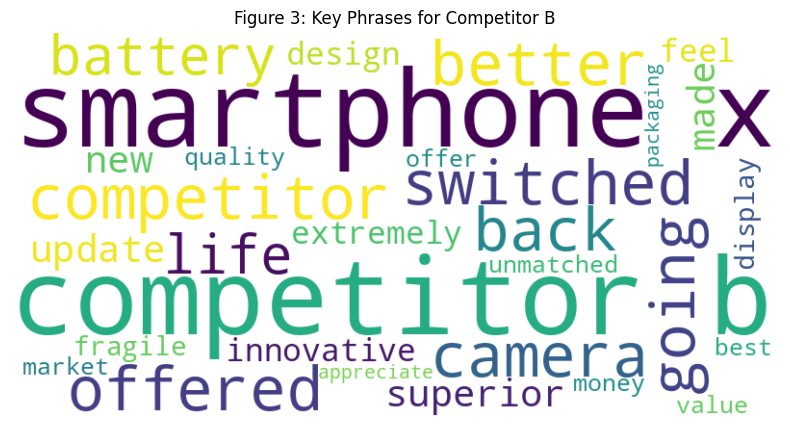


Observations:
Customers generally have a more positive sentiment towards Smartphone X from Competitor A.


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

# Expanded sample reviews/comments for Smartphone X
reviews = [
    "Smartphone X from Competitor A has a better camera than Competitor B.",
    "I switched to Smartphone X offered by Competitor B and I'm not going back. The battery life is superior.",
    "Competitor A's Smartphone X is too expensive for its features.",
    "The new update on Smartphone X from Competitor B has made it extremely user-friendly.",
    "I had issues with the signal strength on Smartphone X from Competitor A.",
    "Competitor B's Smartphone X has an innovative design, but it feels fragile.",
    "Customer service for Smartphone X at Competitor A is outstanding.",
    "The display quality of Smartphone X from Competitor B is unmatched.",
    "Competitor A needs to improve the OS stability of Smartphone X.",
    "Competitor B's Smartphone X offers the best value for money in the market.",
    "Competitor A's Smartphone X has frequent software updates that improve performance.",
    "I appreciate the eco-friendly packaging of Smartphone X by Competitor B."
]

# Preprocess and sentiment analysis setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
sid = SentimentIntensityAnalyzer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Analyzing and aggregating sentiments
sentiment_scores = defaultdict(list)
for review in reviews:
    preprocessed_review = preprocess_text(review)
    sentiment_score = sid.polarity_scores(preprocessed_review)['compound']
    if 'competitor a' in review.lower():
        sentiment_scores['Competitor A'].append(sentiment_score)
    if 'competitor b' in review.lower():
        sentiment_scores['Competitor B'].append(sentiment_score)

# Calculating average sentiment
average_sentiment = {comp: sum(scores)/len(scores) if scores else 0 for comp, scores in sentiment_scores.items()}

# Observations
print("Sentiment Analysis for Smartphone X:")
for comp, score in average_sentiment.items():
    print(f"{comp}: {score:.2f} (Sentiment Score)")

# Visualization: Sentiment Scores
plt.figure(figsize=(10, 6))
bar_labels = list(average_sentiment.keys())
bar_values = list(average_sentiment.values())
plt.bar(bar_labels, bar_values, color=['blue', 'green'])
plt.xlabel('Competitor')
plt.ylabel('Average Sentiment Score')
plt.title('Figure 1: Average Sentiment Score Comparison for Smartphone X')
plt.show()

# Key Phrases WordCloud for each Competitor
for i, (comp) in enumerate(sentiment_scores):
    text = ' '.join([preprocess_text(review) for review in reviews if comp.lower() in review.lower()])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Figure {i+2}: Key Phrases for {comp}')
    plt.axis('off')
    plt.show()

# Observations based on sentiment scores
print("\nObservations:")
if average_sentiment['Competitor A'] > average_sentiment['Competitor B']:
    print("Customers generally have a more positive sentiment towards Smartphone X from Competitor A.")
elif average_sentiment['Competitor A'] < average_sentiment['Competitor B']:
    print("Customers generally have a more positive sentiment towards Smartphone X from Competitor B.")
else:
    print("Sentiment towards Smartphone X is relatively balanced between Competitor A and Competitor B.")
